# **Potato Leaf Disease Classification**

> 🤔 Deep CNN built in this project can be used for classifying images of potato leaves into the respective classes : ```Early Blight```     ```Healthy```    ```Late Blight```

In [1]:
# Imports
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Data
> * First load data from Kaggle API
* Unzip Data using ```ZipFile```
* Use ```tf.keras.utils.image_dataset_from_directory```

In [2]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d rizwan123456789/potato-disease-leaf-datasetpld

 83% 31.0M/37.4M [00:00<00:00, 154MB/s] 
100% 37.4M/37.4M [00:00<00:00, 117MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-disease-leaf-datasetpld.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [7]:
# using the tf.keras.utils.image_dataset_from_directory
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/PLD_3_Classes_256/Training',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)

test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/PLD_3_Classes_256/Testing',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    '/content/PLD_3_Classes_256/Validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)


Found 3251 files belonging to 3 classes.
Found 405 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


In [8]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
train_data_iterator = train_data.as_numpy_iterator()
batch = train_data_iterator.next()

In [10]:
batch[0].shape # Images shape

(32, 224, 224, 3)

In [11]:
batch[0][0]

array([[[128.92857, 165.92857, 209.92857],
        [128.     , 165.     , 209.     ],
        [128.     , 165.     , 209.     ],
        ...,
        [162.07143, 190.07143, 237.07143],
        [162.07143, 190.07143, 237.07143],
        [162.07143, 190.07143, 237.07143]],

       [[128.92857, 165.92857, 209.92857],
        [128.     , 165.     , 209.     ],
        [128.     , 165.     , 209.     ],
        ...,
        [163.     , 191.     , 238.     ],
        [163.     , 191.     , 238.     ],
        [163.     , 191.     , 238.     ]],

       [[128.92857, 165.92857, 209.92857],
        [128.     , 165.     , 209.     ],
        [128.     , 165.     , 209.     ],
        ...,
        [163.     , 191.     , 238.     ],
        [163.     , 191.     , 238.     ],
        [163.     , 191.     , 238.     ]],

       ...,

       [[127.     , 164.     , 208.     ],
        [127.     , 164.     , 208.     ],
        [127.     , 164.     , 208.     ],
        ...,
        [155.     , 188.  

In [12]:
tf.reduce_min(batch[0][0]), tf.reduce_max(batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=245.57677>)

In [13]:
# Looking at a test batch
test_data_iterator = test_data.as_numpy_iterator()
test_batch = test_data_iterator.next()

In [14]:
test_batch[0][0]

array([[[174.07143, 213.07143, 244.07143],
        [175.21428, 214.21428, 245.21428],
        [176.35715, 215.35715, 246.35715],
        ...,
        [142.     , 187.     , 218.     ],
        [142.     , 187.     , 218.     ],
        [142.     , 187.     , 218.     ]],

       [[174.07143, 213.07143, 244.07143],
        [175.21428, 214.21428, 245.21428],
        [176.28061, 215.28061, 246.28061],
        ...,
        [142.     , 187.     , 218.     ],
        [142.     , 187.     , 218.     ],
        [142.     , 187.     , 218.     ]],

       [[174.07143, 213.07143, 244.07143],
        [175.13776, 214.13776, 245.13776],
        [175.64285, 214.64285, 245.64285],
        ...,
        [142.     , 187.     , 218.     ],
        [142.     , 187.     , 218.     ],
        [142.     , 187.     , 218.     ]],

       ...,

       [[168.     , 209.     , 239.     ],
        [168.     , 209.     , 239.     ],
        [168.     , 209.     , 239.     ],
        ...,
        [133.12755, 178.12

In [15]:
tf.reduce_min(test_batch[0][0]), tf.reduce_max(test_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=255.0>)

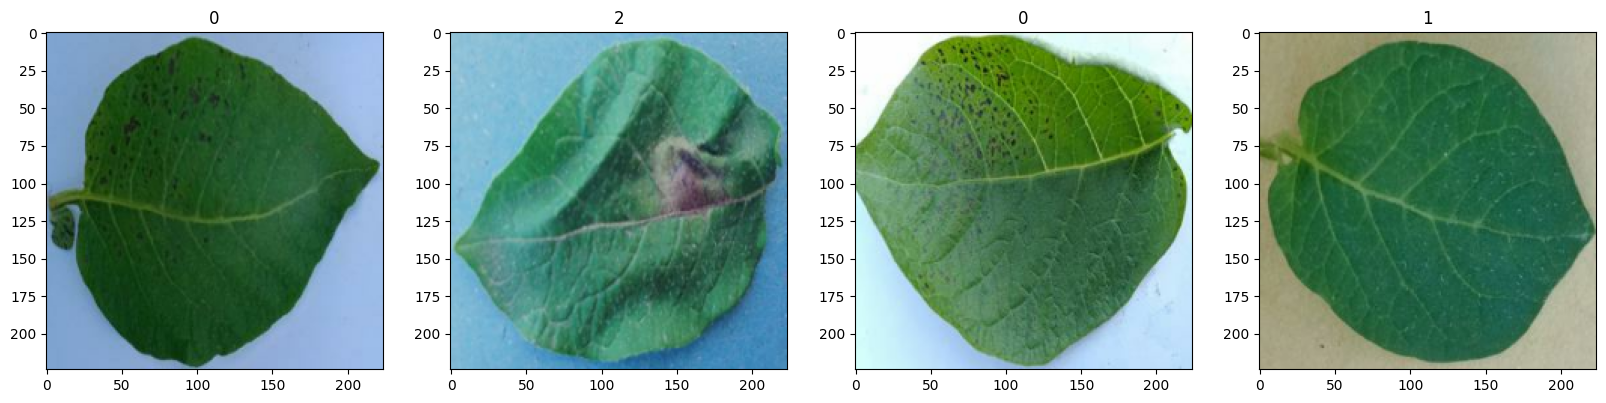

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for indx, image in enumerate(batch[0][:4]):
  ax[indx].imshow(image.astype('int'))
  ax[indx].title.set_text(batch[1][indx])

## Preprocessing Data

In [17]:
train_data = train_data.map(lambda x,y: (x/255, y)) # Train Data Scaling

In [18]:
scaled_train_data_iterator = train_data.as_numpy_iterator()
scaled_batch = scaled_train_data_iterator.next()

In [19]:
scaled_batch[0][0]

array([[[0.85490197, 0.8862745 , 0.9764706 ],
        [0.85490197, 0.8862745 , 0.9764706 ],
        [0.85490197, 0.8862745 , 0.9764706 ],
        ...,
        [0.89411765, 0.92941177, 0.99607843],
        [0.89125645, 0.92655057, 0.99321723],
        [0.89047617, 0.9257703 , 0.99243695]],

       [[0.85490197, 0.8862745 , 0.9764706 ],
        [0.85490197, 0.8862745 , 0.9764706 ],
        [0.85490197, 0.8862745 , 0.9764706 ],
        ...,
        [0.89495796, 0.9302521 , 0.99691874],
        [0.89495796, 0.9302521 , 0.99691874],
        [0.89495796, 0.9302521 , 0.99691874]],

       [[0.85490197, 0.8862745 , 0.9764706 ],
        [0.85490197, 0.8862745 , 0.9764706 ],
        [0.85490197, 0.8862745 , 0.9764706 ],
        ...,
        [0.8980392 , 0.93333334, 1.        ],
        [0.89913964, 0.93443376, 1.        ],
        [0.8994398 , 0.9347339 , 1.        ]],

       ...,

       [[0.58301324, 0.6143858 , 0.70458186],
        [0.58515406, 0.6165266 , 0.7067227 ],
        [0.58963585, 0

In [20]:
tf.reduce_min(scaled_batch[0][0]), tf.reduce_max(scaled_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [21]:
test_data = test_data.map(lambda x,y:(x/255 ,y))
scaled_test_iterator = test_data.as_numpy_iterator()
scaled_test_batch = scaled_test_iterator.next()

In [22]:
scaled_test_batch[0][0]

array([[[0.8167867 , 0.7697279 , 0.7148259 ],
        [0.82913166, 0.78207284, 0.7271709 ],
        [0.8352941 , 0.7882353 , 0.73333335],
        ...,
        [0.939876  , 0.8771309 , 0.81438583],
        [0.94425774, 0.88151264, 0.81876755],
        [0.9484795 , 0.8857343 , 0.8229892 ]],

       [[0.8210084 , 0.77394956, 0.7190476 ],
        [0.8297919 , 0.7827331 , 0.7278311 ],
        [0.8352941 , 0.7882353 , 0.73333335],
        ...,
        [0.94231695, 0.87957186, 0.81682676],
        [0.9444378 , 0.8816927 , 0.8189476 ],
        [0.9443177 , 0.8815726 , 0.8188275 ]],

       [[0.8266907 , 0.77963185, 0.7247299 ],
        [0.83221287, 0.78515404, 0.7302521 ],
        [0.8352941 , 0.7882353 , 0.73333335],
        ...,
        [0.94789916, 0.885154  , 0.8224089 ],
        [0.94539815, 0.88265306, 0.8199079 ],
        [0.9414565 , 0.8787114 , 0.8159663 ]],

       ...,

       [[0.8613446 , 0.7946779 , 0.7554622 ],
        [0.8613446 , 0.7946779 , 0.7554622 ],
        [0.8618448 , 0

In [23]:
tf.reduce_min(scaled_test_batch[0][0]), tf.reduce_max(scaled_test_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.99657863>)

In [24]:
len(train_data), len(test_data)

(102, 13)

## Setting up TensorBoard Callback

In [25]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Model Building
> 🔑 We are going to build a ```base CNN model``` and train it and tune Hyperparameters to get better results, we can also use ```Transfer Learning```

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers.experimental import preprocessing

In [27]:
model1 = Sequential()

# Data Augmentation Layers
model1.add(preprocessing.RandomRotation(0.2))
model1.add(preprocessing.RandomZoom(0.2))
model1.add(preprocessing.RandomFlip('horizontal_and_vertical'))

model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))


model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(3, activation='softmax'))


In [28]:
model1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [29]:
history1 = model1.fit(
    train_data,
    epochs=20,
    batch_size=32,
    validation_data=test_data,
    callbacks=[create_tensorboard_callback(dir_name='Potato-Disease-Classification',
                                           experiment_name='Custom CNN 1')]
)

Saving TensorBoard log files to: Potato-Disease-Classification/Custom CNN 1/20230811-104501
Epoch 1/20
102/102 [==============================] - 27s 111ms/step - loss: 1.2332 - accuracy: 0.4925 - val_loss: 1.0078 - val_accuracy: 0.4716
Epoch 2/20
102/102 [==============================] - 10s 91ms/step - loss: 0.9790 - accuracy: 0.5743 - val_loss: 1.7854 - val_accuracy: 0.3506
Epoch 3/20
102/102 [==============================] - 9s 86ms/step - loss: 0.7733 - accuracy: 0.6749 - val_loss: 0.5874 - val_accuracy: 0.7556
Epoch 4/20
102/102 [==============================] - 6s 52ms/step - loss: 0.6489 - accuracy: 0.7293 - val_loss: 0.6399 - val_accuracy: 0.7802
Epoch 5/20
102/102 [==============================] - 6s 55ms/step - loss: 0.5371 - accuracy: 0.7961 - val_loss: 0.4159 - val_accuracy: 0.8543
Epoch 6/20
102/102 [==============================] - 6s 61ms/step - loss: 0.4484 - accuracy: 0.8219 - val_loss: 1.9242 - val_accuracy: 0.3704
Epoch 7/20
102/102 [===========================

## Transfer Learning Model

In [30]:
from tensorflow.keras.applications import InceptionResNetV2
inception_resnet_convbase = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in inception_resnet_convbase.layers:
  layer.trainable = False # Freezing all the layers

219055592/219055592 [==============================] - 5s 0us/step


In [31]:
data_augmentation_layer = Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomFlip('horizontal_and_vertical')
])

In [32]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = data_augmentation_layer(input_layer)
x = inception_resnet_convbase(x, training=False)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(3, activation='softmax')(x)

inception_resnet_model = Model(input_layer, output)

In [33]:
inception_resnet_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [34]:
inception_resnet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 38400)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               9830656   
                                                                 
 batch_normalization_205 (Ba  (None, 256)              1024      
 tchNormalization)                                           

In [35]:
history_inception_resnet = inception_resnet_model.fit(
    train_data,
    epochs=25,
    batch_size=32,
    validation_data=test_data,
    callbacks=[create_tensorboard_callback(dir_name='Potato-Disease-Classification',
                                           experiment_name='InceptionResNetV2')]
)

Saving TensorBoard log files to: Potato-Disease-Classification/InceptionResNetV2/20230811-104817
Epoch 1/25
102/102 [==============================] - 44s 280ms/step - loss: 0.6278 - accuracy: 0.7678 - val_loss: 0.4426 - val_accuracy: 0.8395
Epoch 2/25
102/102 [==============================] - 21s 206ms/step - loss: 0.4095 - accuracy: 0.8527 - val_loss: 0.3747 - val_accuracy: 0.8815
Epoch 3/25
102/102 [==============================] - 21s 206ms/step - loss: 0.3450 - accuracy: 0.8699 - val_loss: 0.3473 - val_accuracy: 0.8914
Epoch 4/25
102/102 [==============================] - 21s 204ms/step - loss: 0.3060 - accuracy: 0.8914 - val_loss: 0.3933 - val_accuracy: 0.8716
Epoch 5/25
102/102 [==============================] - 22s 208ms/step - loss: 0.2858 - accuracy: 0.8874 - val_loss: 0.2556 - val_accuracy: 0.9259
Epoch 6/25
102/102 [==============================] - 22s 210ms/step - loss: 0.2725 - accuracy: 0.8988 - val_loss: 0.3498 - val_accuracy: 0.8864
Epoch 7/25
102/102 [=============

## Transfer Learning  : ResNet50

In [43]:
from tensorflow.keras.applications import Xception
xception_convbase = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in xception_convbase.layers:
  layer.trainable = False # Freezing all the layers

83683744/83683744 [==============================] - 0s 0us/step


In [44]:
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
layer = data_augmentation_layer(input_layer)
layer = xception_convbase(layer, training=False)
layer = Flatten()(layer)
layer = Dense(256, activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = Dropout(0.3)(layer)
layer = Dense(256, activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = Dropout(0.3)(layer)
output = Dense(3, activation='softmax')(layer)

xception_model = Model(input_layer, output)

In [45]:
xception_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [46]:
xception_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 256)               25690368  
                                                                 
 batch_normalization_215 (Ba  (None, 256)              1024      
 tchNormalization)                                               
                                                           

In [47]:
history_xception = xception_model.fit(
        train_data,
        epochs=25,
        batch_size=32,
        validation_data=test_data,
        callbacks=[create_tensorboard_callback(dir_name='Potato-Disease-Classification',
                                              experiment_name='Xception')]
    )

Saving TensorBoard log files to: Potato-Disease-Classification/Xception/20230811-110618
Epoch 1/25
102/102 [==============================] - 32s 249ms/step - loss: 0.5248 - accuracy: 0.7973 - val_loss: 0.3669 - val_accuracy: 0.8642
Epoch 2/25
102/102 [==============================] - 19s 183ms/step - loss: 0.3443 - accuracy: 0.8730 - val_loss: 0.2606 - val_accuracy: 0.8988
Epoch 3/25
102/102 [==============================] - 19s 180ms/step - loss: 0.3226 - accuracy: 0.8853 - val_loss: 0.2945 - val_accuracy: 0.8864
Epoch 4/25
102/102 [==============================] - 18s 172ms/step - loss: 0.2865 - accuracy: 0.8908 - val_loss: 0.2524 - val_accuracy: 0.9111
Epoch 5/25
102/102 [==============================] - 18s 175ms/step - loss: 0.2754 - accuracy: 0.8945 - val_loss: 0.2443 - val_accuracy: 0.9136
Epoch 6/25
102/102 [==============================] - 18s 170ms/step - loss: 0.2611 - accuracy: 0.9013 - val_loss: 0.2558 - val_accuracy: 0.9111
Epoch 7/25
102/102 [======================

## Model Evaluating
**🤔 Why is Model Evaluating Important**
* Its important to evaluate our model to see its **performence on the test data**
* It also helps in **choosing the best model** among the models that you have built

## Model1

In [48]:
results_custom_cnn = model1.evaluate(test_data)

13/13 [==============================] - 1s 25ms/step - loss: 0.0923 - accuracy: 0.9704


<Axes: >

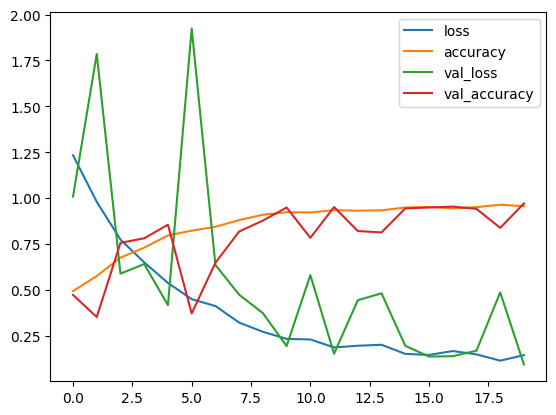

In [49]:
pd.DataFrame(history1.history).plot()

## Inception Resnet V2

In [50]:
results_inception_resnet = inception_resnet_model.evaluate(test_data)
results_inception_resnet

13/13 [==============================] - 2s 165ms/step - loss: 0.1485 - accuracy: 0.9506


[0.14852410554885864, 0.9506173133850098]

<Axes: >

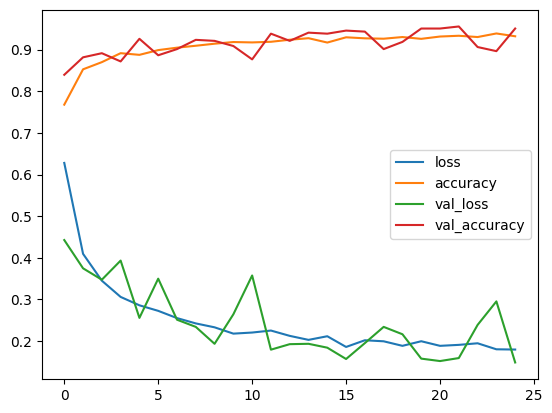

In [54]:
pd.DataFrame(history_inception_resnet.history).plot()

## Xception

In [52]:
results_xception = xception_model.evaluate(test_data)
results_xception

13/13 [==============================] - 2s 133ms/step - loss: 0.2137 - accuracy: 0.9086


[0.21374569833278656, 0.9086419939994812]

<Axes: >

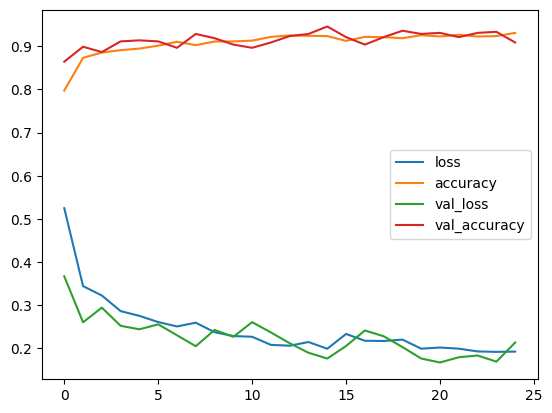

In [53]:
pd.DataFrame(history_xception.history).plot()

## Viewing our results on TensorBoard

In [55]:
# Upload experiment results to TensorBoard (uncomment to run)
!tensorboard dev upload --logdir ./Potato-Disease-Classification\
  --name "Potato Leaf Disease Prediction" \
  --description "Deep CNN model for classifying potato leaves into Early and Late Blight and Healthy" \
  --one_shot

2023-08-11 11:17:29.275134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Potato-Disease-Classification

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   MWVG-BDDS



New experiment created. View your TensorBoard at: https://tensor

## Making Prediction on Validation Generator

In [62]:
validation_iterator = validation_data.as_numpy_iterator()
val_batch = validation_iterator.next()

In [63]:
val_batch[0][0]

array([[[215.92857, 218.92857, 253.92857],
        [215.     , 218.     , 253.     ],
        [215.     , 218.     , 253.     ],
        ...,
        [208.23982, 208.23982, 245.52556],
        [209.7143 , 208.92857, 248.50002],
        [210.85716, 209.85716, 249.85716]],

       [[215.92857, 218.92857, 253.92857],
        [215.     , 218.     , 253.     ],
        [215.     , 218.     , 253.     ],
        ...,
        [207.64287, 207.64287, 244.9286 ],
        [208.61736, 207.83163, 247.40308],
        [209.51532, 208.51532, 248.51532]],

       [[215.92857, 218.92857, 253.92857],
        [215.     , 218.     , 253.     ],
        [215.     , 218.     , 253.     ],
        ...,
        [207.41327, 207.41327, 244.699  ],
        [207.64285, 206.85713, 246.42857],
        [207.64285, 206.64285, 246.64285]],

       ...,

       [[225.     , 226.     , 254.     ],
        [225.     , 226.     , 254.     ],
        [225.     , 226.     , 254.     ],
        ...,
        [213.41328, 216.41

In [64]:
tf.reduce_min(val_batch[0][0]), tf.reduce_max(val_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=16.505283>,
 <tf.Tensor: shape=(), dtype=float32, numpy=255.0>)

In [65]:
# Normalizing Data
validation_data = validation_data.map(lambda x,y: (x/255, y))
scaled_val_iterator = validation_data.as_numpy_iterator()
scaled_val_batch = scaled_val_iterator.next()

In [66]:
scaled_val_batch[0][0]

array([[[0.8509804 , 0.8352941 , 0.8235294 ],
        [0.8509804 , 0.8352941 , 0.8235294 ],
        [0.8509804 , 0.8352941 , 0.8235294 ],
        ...,
        [0.85882354, 0.85490197, 0.8392157 ],
        [0.85882354, 0.85490197, 0.8392157 ],
        [0.85882354, 0.85490197, 0.8392157 ]],

       [[0.8509804 , 0.8352941 , 0.8235294 ],
        [0.8509804 , 0.8352941 , 0.8235294 ],
        [0.8509804 , 0.8352941 , 0.8235294 ],
        ...,
        [0.85882354, 0.85490197, 0.8392157 ],
        [0.85882354, 0.85490197, 0.8392157 ],
        [0.85882354, 0.85490197, 0.8392157 ]],

       [[0.8509804 , 0.8352941 , 0.8235294 ],
        [0.8509804 , 0.8352941 , 0.8235294 ],
        [0.8509804 , 0.8352941 , 0.8235294 ],
        ...,
        [0.85882354, 0.85490197, 0.8392157 ],
        [0.85882354, 0.85490197, 0.8392157 ],
        [0.85882354, 0.85490197, 0.8392157 ]],

       ...,

       [[0.78067225, 0.764986  , 0.7532213 ],
        [0.78431374, 0.76862746, 0.75686276],
        [0.78431374, 0

In [67]:
tf.reduce_min(scaled_val_batch[0][0]), tf.reduce_max(scaled_val_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.8988196>)

In [69]:
# Making Predictions InceptionResnetV2
results_inception_resnet_validation = inception_resnet_model.evaluate(validation_data)
results_inception_resnet_validation

13/13 [==============================] - 2s 163ms/step - loss: 0.2079 - accuracy: 0.9135


[0.20787149667739868, 0.9134615659713745]

In [70]:
# Making Predictions Custom CNN
results_validation1 = model1.evaluate(validation_data)
results_validation1

13/13 [==============================] - 1s 35ms/step - loss: 0.0874 - accuracy: 0.9663


[0.08740841597318649, 0.9663461446762085]

In [71]:
# Making Predicitons using Xception
results_xception_val = xception_model.evaluate(validation_data)
results_xception_val

13/13 [==============================] - 2s 133ms/step - loss: 0.2518 - accuracy: 0.8990


[0.2518376410007477, 0.8990384340286255]

## Making a predict function for testing model with custom images

In [102]:
class_names = ['Early Blight', 'Healthy', 'Late Blight']
def single_predictions(img_path, img_size=224):
  img = tf.io.read_file(img_path)
  decoded_img = tf.io.decode_image(img)
  resized_img = tf.image.resize(decoded_img, [img_size, img_size])
  input_tensor = tf.cast(resized_img/255. , dtype=tf.float32)
  y_pred = model1.predict(tf.expand_dims(input_tensor, axis=0))
  plt.imshow(input_tensor)
  plt.title(f'{class_names[tf.squeeze(np.argmax(y_pred, axis=1))]} \n Probability : {tf.reduce_max(y_pred)}')

1/1 [==============================] - 0s 20ms/step


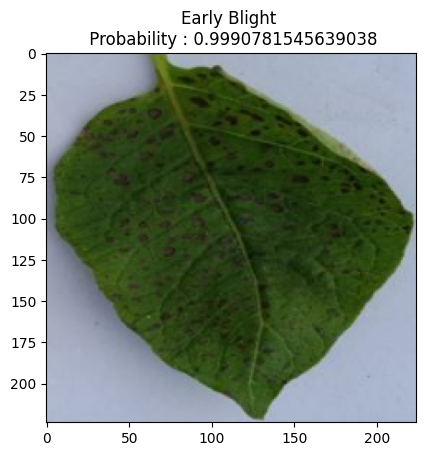

In [103]:
single_predictions('/content/PLD_3_Classes_256/Validation/Early_Blight/Early_Blight_101.jpg')

1/1 [==============================] - 0s 22ms/step


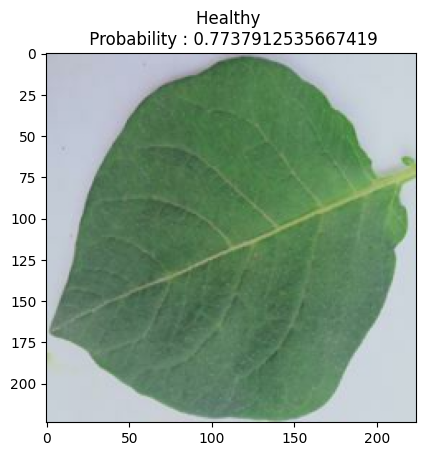

In [104]:
single_predictions('/content/PLD_3_Classes_256/Validation/Healthy/Healthy_18.jpg')

1/1 [==============================] - 0s 33ms/step


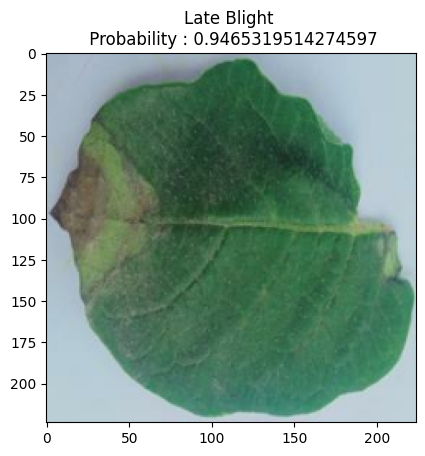

In [105]:
single_predictions('/content/PLD_3_Classes_256/Validation/Late_Blight/Late_Blight_127.jpg')

## Saving our model

In [106]:
model1.save('Potato_Leaf_Disease_detection_model.h5')